DATA620: Web Analytics Week 7 Omar Pineda Fall 2019

1. Identify a large 2-mode network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
2. Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
3. What can you infer about each of the distinct groups?


We chose to analyze the Moreno Valley 2-mode dataset on crime where there are two types of nodes: individuals involved in crimes and the crime events themselves. We first saved the edges file that we found online (http://networkrepository.com/ia-crime-moreno.php) into a .csv file so that we could load it into a dataframe and add more information to the dataset. In particular, we added the type of node represented in the edge connections, whether they were a person or a crime.

Dataset citation:
      title = {The Network Data Repository with Interactive Graph Analytics and Visualization},
      author={Ryan A. Rossi and Nesreen K. Ahmed},
      booktitle = {AAAI},
      url={http://networkrepository.com},
      year={2015}
      
To start, we import our libraries and load our dataset. Here's a preview of our data:

In [1]:
#Load Libraries
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Load dataset
moreno = pd.read_csv('ia-crime-moreno.csv')
moreno.head()

,person,crime
0,1,1
1,1,2
2,1,3
3,1,4
4,2,5


Next, we created our bipartite sets and visualized the network. People are in grey and the crime events are red. There are 829 nodes and 1475 edges, and the average degree is 3.5585.

Name: 
Type: Graph
Number of nodes: 829
Number of edges: 1475
Average degree:   3.5585


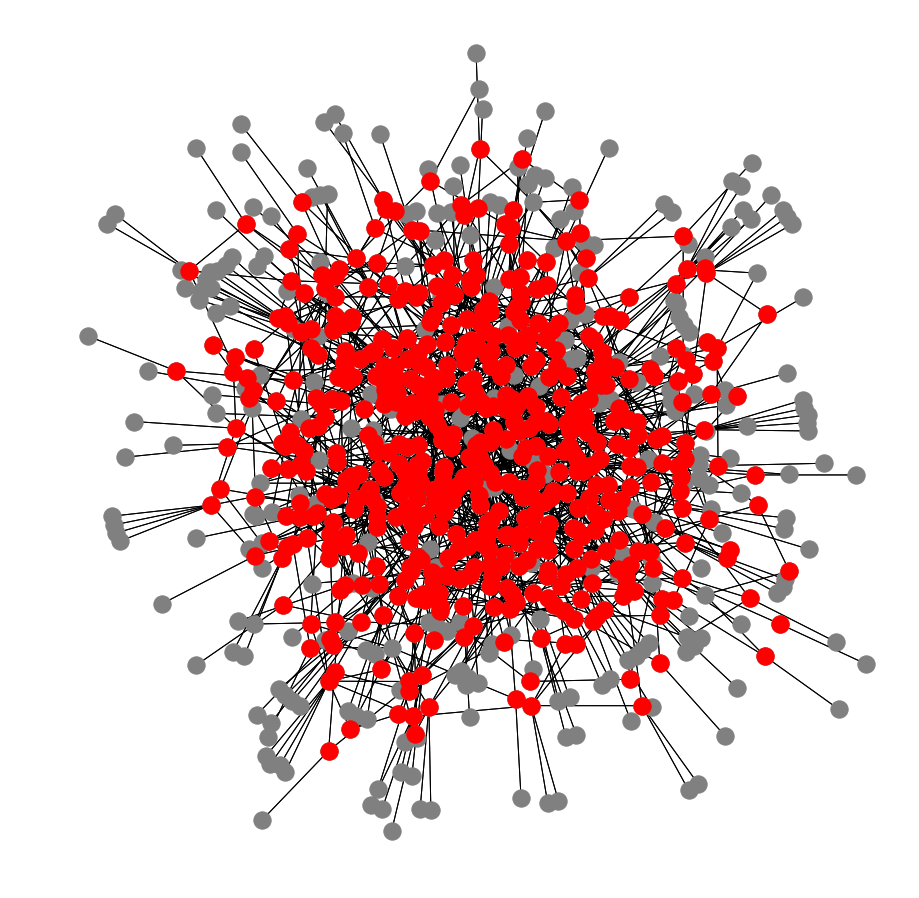

In [3]:
people = pd.DataFrame(moreno.person.unique(), columns=['person'])
people['node_type'] = 'person'
crimes = pd.DataFrame(moreno.crime.unique(), columns=['crime'])
crimes['node_type'] = 'crime'

p_nodes = list(people['person'])
c_nodes = list(crimes['crime'])
edges = [tuple(i) for i in moreno.values]

mor = nx.Graph()
mor.add_nodes_from(p_nodes,node_type='person', bipartite=0)
mor.add_nodes_from(c_nodes,node_type='crime', bipartite=1)
mor.add_edges_from(edges)
        
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(mor)
nx.draw(mor,pos=pos, nodelist = p_nodes, node_color='grey')
nx.draw(mor,pos=pos, nodelist = c_nodes, node_color='red')
print(nx.info(mor))

Next, we apply the island method as described in Chapter 4 of Social Network Analysis for Startups in order to reduce the size of our network of people involved in crimes.

In [4]:
p = bipartite.weighted_projected_graph(mor, p_nodes)
#c = bipartite.weighted_projected_graph(mor, c_nodes)

In [10]:
#Code from textbook with a minor adjustment in the add_edge function so that it works with our version of networkx
def trim_edges(g, weight = 1):
    g2 = nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,attr_dict = edata)
    return g2

def island_method(g, iterations = 5):
    weights = [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    step = int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [14]:
p_islands = island_method(p, iterations = 4)
p_islands

[[1, <networkx.classes.graph.Graph at 0xa17aa6310>],
 [2, <networkx.classes.graph.Graph at 0xa17742ad0>],
 [3, <networkx.classes.graph.Graph at 0xa17aa6750>],
 [4, <networkx.classes.graph.Graph at 0xa17742c90>]]

We have four thresholds to consider in our output, and visually our networks at each of the water levels look like the following:

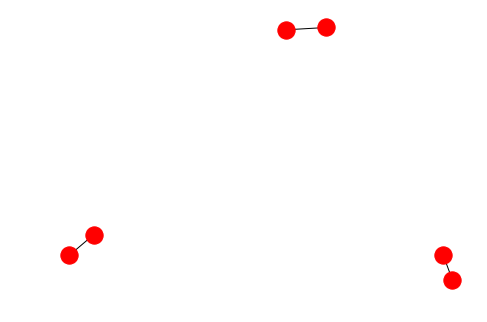

In [16]:
nx.draw(p_islands[3][1])

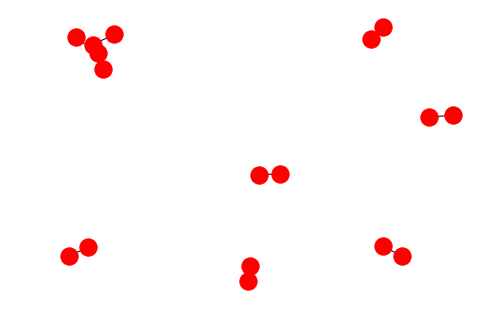

In [17]:
nx.draw(p_islands[2][1])

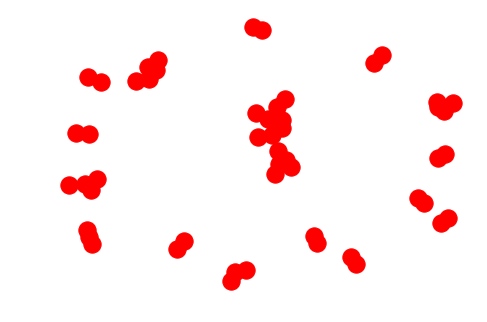

In [18]:
nx.draw(p_islands[1][1])

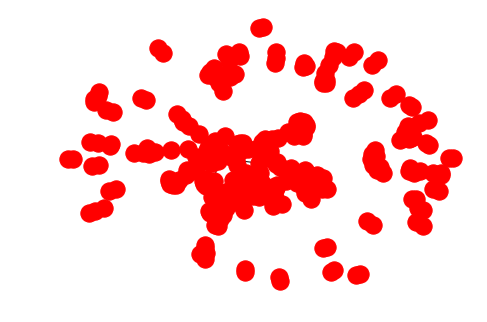

In [19]:
nx.draw(p_islands[0][1])

We'll look out our third water level which consists of 8 islands of people involved in crimes. There are 17 nodes, or people, 9 edges and an average degree of 1.06. These are the 17 people most involved in crimes, and it is likely that these are the people committing the crimes, unless there are unlucky frequent victims of crimes.

Name: 
Type: Graph
Number of nodes: 17
Number of edges: 9
Average degree:   1.0588


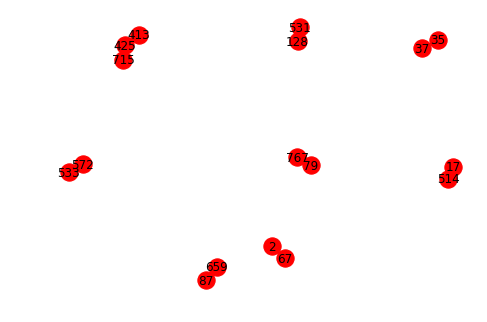

In [40]:
chosen_people = p_islands[2][1]
nx.draw(chosen_people, with_labels = True)
print(nx.info(chosen_people))

These are the notorious criminals that have possibly collaborated with one another in these crimes:

In [38]:
chosen_people.nodes()

NodeView((128, 2, 67, 37, 425, 715, 514, 79, 531, 17, 35, 659, 533, 87, 572, 413, 767))

We can visualize the ego networks for some of these criminals who are connected to one another as well. First for person 128, who is involved in 7 crimes.

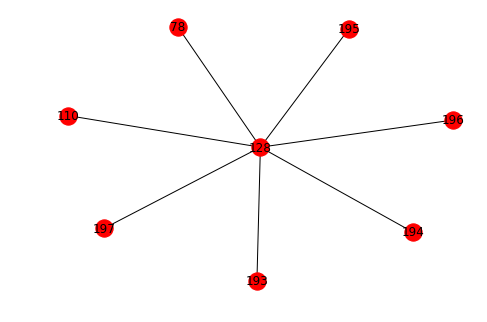

In [39]:
p128 = nx.ego_graph(mor, 128, radius = 1)
nx.draw(p128, with_labels = True)

Next, we can see the ego network for person 531 which is associated with person 128. Person 531 is involved in 11 crimes. Person 531 and person 128 have the following crime events in common: 110, 194, 195, 196, and 197.

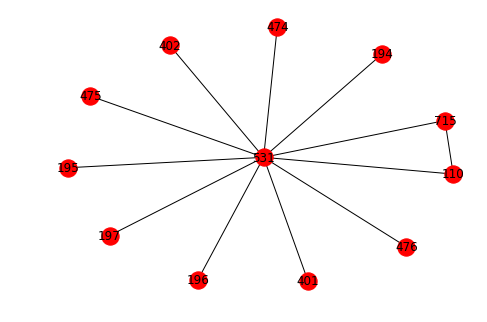

In [41]:
p531 = nx.ego_graph(mor, 531, radius = 1)
nx.draw(p531, with_labels = True)

Conclusion

This analysis through an implementation of the island method reveals to us that some of these criminals are in fact connected with one another through crimes as well, so there is a strong likelihood that there are criminals that have worked together in Moreno and that some of this has been part of organized crime. The island method reveals to us connections that may not be immediately obvious but are apparent when we start seeing the signal within the noise.